# Error encoding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
arr = np.loadtxt("data.csv",
                 delimiter=",", dtype=float)[1:]
X, y = arr[:, 0:2], arr[:, -1]

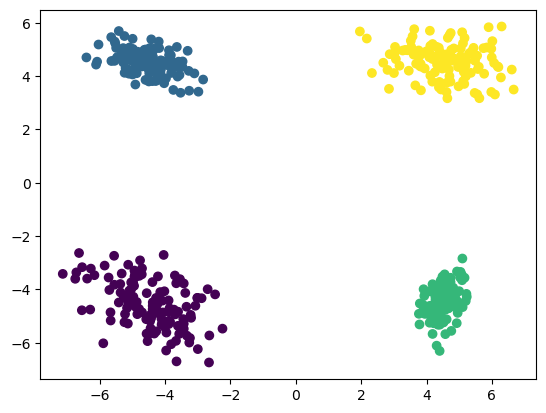

In [17]:
plt.figure()
plt.scatter(X[:, 0:1], X[:, -1], c = y)
plt.show()

In [183]:
def Pocket(X,Y) :
    
    X_cpy = []
    X_cpy = np.c_[np.ones((X.shape[0],1)),X] # add the bias term in the beginning of our data 
      
    time = []
    error = []
    
    cls = np.unique(Y) # list of the unique labels we have
    
    # let's create a copy of y having 1 and -1 for our error function
    
    y_cpy = []
    for y in Y :
        if y == cls[0] :
            y_cpy.append(-1)
        else :
            y_cpy.append(1)
    
    # n , m : nombre des exemples de training , nombre de feautres

    n,m = X_cpy.shape
    
    w = np.random.randn(m) # inialize the weights randomly
    
    ws = w
    Tmax = 100
    error.append(Evaluate_error(ws,X_cpy,y_cpy))
    time.append(0)
    for t in range(Tmax) :
        w , tt ,  Ls_W = Perceptron(X,Y)
        Ls_Ws = Evaluate_error(ws,X_cpy,y_cpy)
        if Ls_W[len(Ls_W)-1] < Ls_Ws :
            ws = w
            error.append(Ls_W[len(Ls_W)-1])
            time.append(t+1)
            
    return ws

In [14]:
#our error function using sign
def Evaluate_error(w,X,Y) :
    n = X.shape[0]
    L = 0 
    for i in range(n) :    
        prediction = np.dot(w,X[i]) / abs(np.dot(w,X[i]))
        if prediction != Y[i]  :
            L += 1
    
    return L / n

In [16]:
def Perceptron(X,Y) :
    

    X_cp = []
    X_cp = np.c_[np.ones((X.shape[0],1)),X] # add the bias term in the beginning of our data 
    
      
    time = []
    error = []
    
    cls = np.unique(Y) # list of the unique labels we have
    
    # let's create a copy of y having 1 and -1 for our error function
    
    y_cp = []
    for y in Y :
        if y == cls[0] :
            y_cp.append(-1)
        else :
            y_cp.append(1)
    
    n,m = X_cp.shape
    
    w = np.random.randn(m) # inialize the weights randomly
            
    t = 0
    Ls_W = Evaluate_error(w,X_cp,y_cp)
    
    error.append(Ls_W)
    time.append(t)
    
    
    while (Ls_W > 0.45) :
        #print(Ls_W)
        for i in range(n) :
            if np.dot(w,X_cp[i].T)*y_cp[i] < 0 :
                w = w + y_cp[i]*X_cp[i]
                t+=1
        Ls_W = Evaluate_error(w,X_cp,y_cp)
        error.append(Ls_W)
        time.append(t)

    return w , time ,error

In [10]:
def train_test_split(X, y, ratio = 0.7):
    
    # dataset split function 
    
    '''
    (X ,y)  : our data 
    ratio : % of data that goes to the training set

    '''
    
    n = len(X)
    n_samples = int(np.around(n*ratio, 0))
    n_data = np.arange(n)
    np.random.shuffle(n_data)
    idx_train = np.random.choice(n_data, n_samples, replace=False)
    idx_test = list(set(n_data) - set(idx_train))    
    X_train , X_test , Y_train, Y_test = X[idx_train, ], X[idx_test, ], y[idx_train, ], y[idx_test, ]
    return X_train , X_test , Y_train, Y_test

In [24]:
# Let's plot our results on linearly seperable data with noise using one vs all method with adaline as a classifier
train_X1, test_X1 , train_Y1, test_Y1 = train_test_split(X, y, 0.8)
wts1 = OneVsOne(train_X1, train_Y1, Pocket) # returns all the weigths after the multiclassification 

In [20]:
# our function to plot our seperators 
def plot_func(w, x):
    return -(w[0]/w[2])- x*(w[1]/w[2])

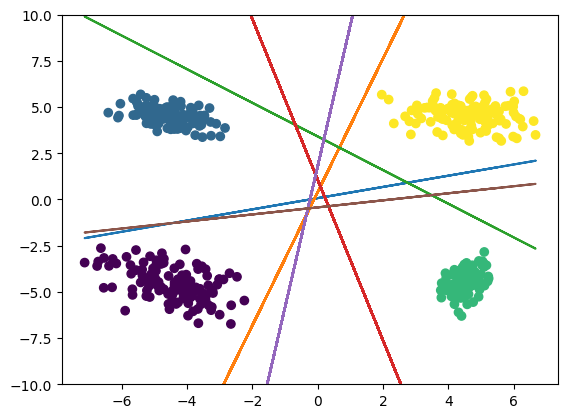

In [25]:
plt.figure()
plt.ylim(-10, 10)
plt.scatter(X[:, 0:1], X[:, 1:2], c = y)
for k in wts1:
    plt.plot( train_X1[:, 0:1], plot_func(k, train_X1[:, 0:1])) # lets plot each seperator using its weight
plt.show()

In [27]:
def OneVsRest(X, y, f):

    
    """
    
    X : data 
    y : labels 
    f : classifier 
    
    """
    
    
    # Get the unique labels
    classes = np.unique(y)

    Weights = [] # weight list that contains all the obtained classifiers

    # Iterate over the class pairs
    
    for i in range(len(classes)):
        tmp = np.copy(classes)

        tmp = tmp[tmp != i] # we eliminate a label each time we classify using it 

        # Get the class indices for the current pair

        idx1 = np.where(y == classes[i])[0]  # indexes of our class 
        idx2 = np.where(y != classes[i])[0]  # indexes of the all the others classes for one class

        y_tmp = np.copy(y)
        
        y_tmp[idx1] = np.full((y[idx2].shape[0],),1)
        y_tmp[idx2] = np.full((y[idx2].shape[0],),-1) # we make all the classes other than the one class with same label 

        # Get the corresponding data
        
        X_pair = np.concatenate((X[idx1], X[idx2]))
        y_pair = np.concatenate((y_tmp[idx1], y_tmp[idx2]))
        w ,time , error = f(X_pair,y_pair) # we make our classification using our selected classifier
        
        Weights.append(w) # add the final weight to our weight list
    return Weights

In [23]:
def OneVsOne(X, y, f):
    
    """
    X : data 
    y : labels
    f : classification function
    
    """
     
    
    # Get the unique labels
    classes = np.unique(y)
    

    Weights =[]

    # Iterate over the class pairs (i , j)
    #print(len(classes))
    for i in range(0, len(classes)):
        for j in range(i+1, len(classes)):
            # Get the class indices for the current pair
            idx1 = np.where(y == classes[i])[0] # indexes of the classe i 
            idx2 = np.where(y == classes[j])[0] # indexes of the classe j
    
            # Get the corresponding data
            X_pair = np.concatenate((X[idx1], X[idx2]))
            y_pair = np.concatenate((y[idx1], y[idx2]))

            


    

            w ,time , error = f(X_pair,y_pair) # we make our binary classification 
            Weights.append(w)
            #print(w)
    
    
    return Weights

In [22]:
np.unique(y)

array([0, 1, 2, 3])

In [82]:
def error_matrix(y):
    
    # size of the error matrix
    M = len(np.unique(y))
    L = (2 ** (M - 1) - 1 )
    
    # Let's fill the first two rows
    tmp = np.ones((M,  L)) 
    row2_idx = 2 ** (M - 2)
    tmp[1, :row2_idx] = -1
    
    
    for i in range(2, M) : 
        idx = 2 ** (M - i-1)
        j = 0
        while(j+idx <= L):
            #print(j, j+idx)
            tmp[i, j:j+idx] = -1
            j += 2*idx
    return tmp
        

In [89]:
err_mtx = error_matrix(y)
err_mtx

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.]])

In [91]:
err_mtx[:, 0]

array([ 1., -1., -1., -1.])

In [88]:
tmp

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
         1.,  1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,
        -1.,  1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,
         1.,  1.]])

In [198]:
instance = ECOC(X, y, Pocket, 0.95)
instance.train()

0
actual class :  2  ****** predicted class :  2
1
actual class :  2  ****** predicted class :  2
2
actual class :  0  ****** predicted class :  0
3
actual class :  2  ****** predicted class :  2
4
actual class :  1  ****** predicted class :  1
5
actual class :  3  ****** predicted class :  3
6
actual class :  3  ****** predicted class :  3
7
actual class :  2  ****** predicted class :  2
8
actual class :  1  ****** predicted class :  1
9
actual class :  0  ****** predicted class :  0
10
actual class :  2  ****** predicted class :  2
11
actual class :  3  ****** predicted class :  3
12
actual class :  3  ****** predicted class :  3
13
actual class :  0  ****** predicted class :  0
14
actual class :  2  ****** predicted class :  2
15
actual class :  2  ****** predicted class :  2
16
actual class :  3  ****** predicted class :  3
17
actual class :  3  ****** predicted class :  3
18
actual class :  1  ****** predicted class :  1
19
actual class :  0  ****** predicted class :  0
20
actual 

In [199]:
class ECOC :  
    
    def __init__(self, X, y, f, ratio) :
        '''
        X , y : our data 
        f : classification model
        S : error matrix initialized with None
        '''
        self.X = X
        self.y = y 
        self.f = f
        self.ratio = ratio
        self.S = self.error_matrix()
    
    # function that calculates the error matrix
    def error_matrix(self):
        # size of the error matrix
        M = len(np.unique(self.y))
        L = (2 ** (M - 1) - 1 )
        # Let's fill the first two rows
        tmp = np.ones((M,  L)) 
        row2_idx = 2 ** (M - 2)
        tmp[1, :row2_idx] = -1
        for i in range(2, M) : 
            idx = 2 ** (M - i-1)
            #print(idx)
            j = 0
            while(j+idx <= L):   
                tmp[i, j:j+idx] = -1
                j += 2*idx 
        return tmp

    
    # function to split our data for training and testing
    def train_test_split(self):    
        #ratio : % of data that goes to the training set
        n = len(self.X)
        n_samples = int(np.around(n*self.ratio, 0))
        n_data = np.arange(n)
        np.random.shuffle(n_data)
        idx_train = np.random.choice(n_data, n_samples, replace=False)
        idx_test = list(set(n_data) - set(idx_train))    
        X_train , X_test , Y_train, Y_test = self.X[idx_train, ], self.X[idx_test, ], self.y[idx_train, ], self.y[idx_test, ]
        return X_train , X_test , Y_train, Y_test
    
     # a function that gets the indexes 
    def construct_binary_problems(self,Y_d): 
        cls = np.unique(self.y)
        binary_indexes = []
        for i in range(self.S.shape[1]):
            # Let's determine the positive and negative classes
            pos_class_idx = np.where(self.S[:,i] == 1)
            neg_class_idx = np.where(self.S[:,i] != 1)
            pos_classes = cls[pos_class_idx]
            neg_classes = cls[neg_class_idx]
            #Let's now create our subdatasets for each binary problem
            pos_cond = [Y_d == pos_classes[i] for i in range(len(pos_classes))]
            neg_cond = [Y_d == neg_classes[i] for i in range(len(neg_classes))]
            pos_idx = np.where(np.logical_or.reduce(pos_cond))[0]  
            neg_idx = np.where(np.logical_or.reduce(neg_cond))[0] 
            # Create a tuple of both positive and negative indexes
            tmp = (pos_idx, neg_idx)
            binary_indexes.append(tmp)    
        return binary_indexes
    
    
    # calculate the distance between two binary sequences
    def Hamming_distance(self,u, v):
        #u, v : two vectors containing elements 1/-1
        
        if len(u) != len(v) : 
            print('smtg not right')
        
        d = len(np.where(u != v)[0])
        return d
    
    
    def train(self): 
        X_train , X_test , Y_train, Y_test = self.train_test_split()
        binary_idx = self.construct_binary_problems(Y_train)
        X_tmp = np.copy(X_train)
        model_list = []
        for tup in binary_idx : 
            y_tmp = np.copy(Y_train)
            y_tmp[tup[0]] = 1 
            y_tmp[tup[1]] = -1
            res = self.f(X_tmp, y_tmp) #returns the final weights/predicting parameters/lagrange multipliers(in case of SOM)
            model_list.append(res)
        #Let's evaluate the test set using all the hypothesis to create a binary sequence
        
        y_pred = np.zeros(Y_test.shape)
        i = 0
        for x in X_test : 
            print(i)
            #print(x)
            tmp_x = np.array([1, x[0], x[1]])
            mod_Vect = []  # a vector of size L
            for res in model_list :
                dot = np.dot(tmp_x , res)
                sigmoid = 1 / (1 + np.exp(-dot))
                if sigmoid > 0.5 : 
                    mod_Vect.append(1)
                else :
                    mod_Vect.append(-1)
            mod_Vect = np.array(mod_Vect)
            
            # we now extract the class corresponding to the input instance
            distance_list = []
            for row in self.S : 
                d = self.Hamming_distance(mod_Vect, row)
                distance_list.append(d)
            min_idx = np.argmin(distance_list) # is the index corresponding to the predicted class
            result_class = np.unique(self.y)[min_idx]
            y_pred[i] = result_class
            print('actual class : ', Y_test[i] ,' ****** predicted class : ',result_class )
            i+= 1
            
        # now as we have constructed our predicted labels, lets test our accuracy : 
        
        acc = len(np.where(y_pred == Y_test)[0]) / len(Y_test)
   
        print('the accuracy of this model is : ', acc)    

In [157]:
'''def Hamming_distance(u, v):
        
        s = set()
        l = len(u)
        for p in range(l):
            if u[p] != v[p] :
                s.add(p)
        d = len(s)
        
        return d'''

'def Hamming_distance(u, v):\n        \n        s = set()\n        l = len(u)\n        for p in range(l):\n            if u[p] != v[p] :\n                s.add(p)\n        d = len(s)\n        \n        return d'

In [158]:
u = np.array([1, -1 ,1 ,-1 ,-1, 1])
v = np.array([-1, 1 ,-1 ,-1 ,-1, -1]) 
Hamming_distance(u, v)

4

In [116]:
def construct_binary_problems(err_mtx, y): 
    
    cls = np.unique(y)
    
    binary_indexes = []
    
    for i in range(err_mtx.shape[1]):
        
        # Let's determin the positive and negative classes
        pos_class_idx = np.where(err_mtx[:,i] == 1)
        neg_class_idx = np.where(err_mtx[:,i] != 1)
        pos_classes = cls[pos_class_idx]
        neg_classes = cls[neg_class_idx]
          
        #Let's now create our subdatasets for each binary problem
        pos_cond = [y == pos_classes[i] for i in range(len(pos_classes))]
        neg_cond = [y == neg_classes[i] for i in range(len(neg_classes))]
        
        pos_idx = np.where(np.logical_or.reduce(pos_cond))[0]  
        neg_idx = np.where(np.logical_or.reduce(neg_cond))[0] 
        
        tmp = (pos_idx, neg_idx)
        binary_indexes.append(tmp)

        '''
        X_tmp = np.copy(X)
        y_tmp = np.copy(y)
        y_tmp[pos_idx] = 1 
        y_tmp[neg_idx] = -1
        
        X_pos, Y_pos = X[pos_idx], y[pos_idx]
        X_neg, Y_neg = X[neg_idx], y[neg_idx]'''
    
    
    return binary_indexes
        

In [126]:
res = construct_binary_problems(err_mtx, y)
len(res[0][0])+len(res[0][1]) == len(y),len(res)

(True, 7)

In [113]:
l = np.array([1, 0])
l2 = np.array([2, 3])
conditions = [y == l[i] for i in range(len(l))]
idx = np.where(np.logical_or.reduce(conditions))[0]
conditions2 = [y == l2[i] for i in range(len(l2))]
idx2 = np.where(np.logical_or.reduce(conditions2))[0]
len(idx) + len(idx2) == len(y)

True

In [117]:
err_mtx

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.]])

In [142]:
tst = np.array([1,train_X1[0,0],train_X1[0, 1]])
w = wts1[0]

dot = np.dot(w, tst)
sigmoid = 1 / (1 + np.exp(-dot))
sigmoid
print()

0.9999997423698836

In [ ]:
def evaluate(weights, X_test, y_test):
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    dot_product = np.dot(X_test, weights)
    sigmoid = 1 / (1 + np.exp(-dot_product))
    y_pred = np.where(sigmoid > 0.5, 1, 0)
    accuracy = np.mean(y_pred == y_test)
    return accuracy